# Individual components 

- author : Sylvie Dagoret-Campagne
- affiliation : IJCLab/IN2P3/CNRS
- creation date : 2024/11/26
- last update : 2024/11/26


This emulator is based from datagrid of atmospheric transparencies extracted from libradtran

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

# to enlarge the sizes
params = {'legend.fontsize': 'large',
          'figure.figsize': (12, 6),
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'xx-large',
         'ytick.labelsize':'xx-large'}
plt.rcParams.update(params)

In [2]:
import warnings
warnings.filterwarnings('ignore')

# Imports

In [3]:
from getObsAtmo.getObsAtmo import ObsAtmo,validateObsName,Dict_Of_sitesPressures,getObsSiteDataFrame

# Check information

In [4]:
Dict_Of_sitesPressures

{'LSST': 731.50433,
 'CTIO': 774.6052,
 'OHP': 937.22595,
 'PDM': 710.90637,
 'OMK': 600.17224,
 'OSL': 1013.0}

### Choose Rubin-LSST observation sites but other sites may be chosen

In [5]:
obssitename = 'LSST'
obs_str = validateObsName(obssitename) 
std_pressure = Dict_Of_sitesPressures[obs_str]


In [6]:
emul =  ObsAtmo(obs_str= obssitename)

LSST site name validated as LSST observatory


# Typical transmission plot

- show a typical transmission plot

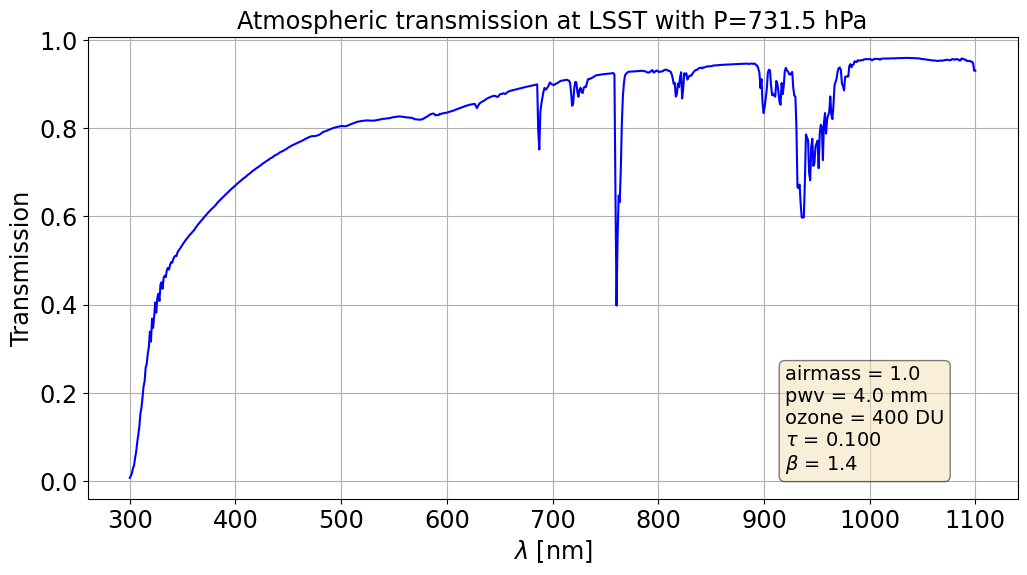

In [8]:
emul.plot_transmission()

# Setting atmospheric parameters

In [27]:
WL = emul.GetWL()
am = 1.0
pwv = 5.0
oz= 300.
tau= 0.04
beta = 1.3

## Check emulator with Rayleigh scattering

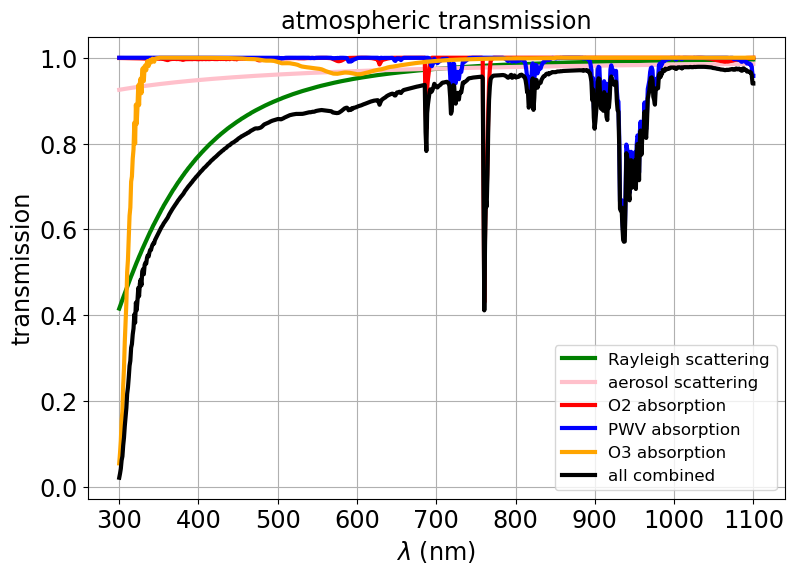

In [28]:
fig, ax = plt.subplots(figsize=(9,6))


transm_r = emul.GetRayleighTransparencyArray(WL,am)
transm_o2 = emul.GetO2absTransparencyArray(WL,am)   
transm_pwv = emul.GetPWVabsTransparencyArray(WL,am,pwv)
transm_o3 = emul.GetOZabsTransparencyArray(WL,am,oz)
transm_aer = emul.GetAerosolsTransparencies(WL,am,tau,beta) 
transm_all = emul.GetAllTransparencies(WL,am,pwv,oz,tau,beta)
    
 
ax.plot(WL,transm_r,"-",color="g",lw=3,label="Rayleigh scattering")
ax.plot(WL,transm_aer,"-",color="pink",lw=3,label="aerosol scattering")
ax.plot(WL,transm_o2,"-",color="r",lw=3,label="O2 absorption")
ax.plot(WL,transm_pwv,"-",color="b",lw=3,label="PWV absorption")
ax.plot(WL,transm_o3,"-",color="orange",lw=3,label="O3 absorption")
 
ax.plot(WL,transm_all,"-",color="k",lw=3,label="all combined")

title = f"atmospheric transmission"
ax.set_title(title)
ax.set_xlabel("$\lambda$ (nm)")
ax.set_ylabel("transmission")
# place a text box in upper left in axes coords
#ax.text(0.5, 0.05, textboxstr, transform=ax.transAxes, fontsize=14,verticalalignment='bottom', bbox=textboxprops)
ax.grid()
ax.legend()
plt.show()